<a href="https://colab.research.google.com/github/SeongGwangJu/SeongGwangJu/blob/main/%EB%A7%8C%EB%93%A4%EB%A9%B4%EC%84%9C_%EB%B0%B0%EC%9A%B0%EB%8A%94_AI_%EC%84%9C%EB%B9%84%EC%8A%A4_%EC%8B%A4%EC%8A%B51_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOOGLE_API_KEY

# Gemini API 사용

### 패키지 설치
Langchain, Google-genai 패키지를 설치합니다.

In [1]:
!pip install langchain langchain-google-genai -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.7.0 which is incompatible.


### API 키 등록
Gemini API를 사용하기 위해서 Google_API_Key를 불러옵니다.
Colab 왼쪽 패널의 `보안 비밀`, `Gemini API 키`, `Google AI Studio에서 키 가져오기`를 선택해 키를 불러옵니다.

In [6]:
from google.colab import userdata
import os

# Secrets에 저장된 값을 가져옵니다.
my_api_key = userdata.get('GOOGLE_API_KEY')

# os.getenv()를 사용하는 라이브러리와의 호환을 위해 os.environ에 설정해줍니다.
os.environ['GOOGLE_API_KEY'] = my_api_key

# 이제 os.getenv()로 값을 읽을 수 있습니다.
retrieved_key = os.getenv('GOOGLE_API_KEY')
print("키를 성공적으로 불러왔습니다.")

키를 성공적으로 불러왔습니다.


# Langchain 프레임워크를 사용해 llm 답변 받기

Langchain 프레임워크를 사용해 간단한 llm 답변을 받아봅시다.

먼저, 프레임워크를 불러옵니다.

In [8]:
from langchain_google_genai import ChatGoogleGenerativeAI

다음으로, 사용할 모델을 설정합니다.

사용할 Gemini 모델은 다음과 같습니다.
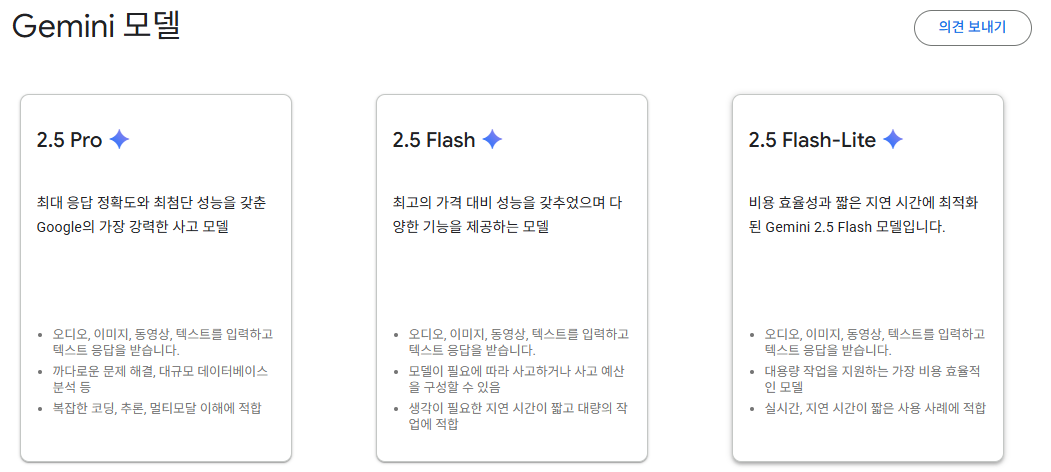

# ChatGoogleGenerativeAI
`ChatGoogleGenerativeAI`는 `langchain_google_genai` 패키지에 포함된 클래스로, Google의 생성형 AI 모델(e.g., Gemini) API를 추상화하는 래퍼(Wrapper)입니다.

* `model`

  사용할 Google AI 모델의 버전을 지정합니다. 어떤 성능의 '두뇌'를 사용할지 선택하는 것과 같습니다. 각 모델은 성능, 속도, 비용 등에서 차이가 있으므로 목적에 맞게 선택해야 합니다.

* `temperature`

  모델 답변의 창의성 또는 무작위성을 조절하는 파라미터로, 0.0에서 2.0 사이의 값을 사용합니다.

  * 낮은 값 (예: 0.1): 더 일관되고 사실에 기반한, 예측 가능한 답변을 생성합니다.

  * 높은 값 (예: 0.9): 더 다양하고 창의적이며, 때로는 예상치 못한 답변을 생성합니다.

* `max_output_tokens`

  모델이 생성할 수 있는 답변의 최대 길이를 토큰(단어 또는 단어의 일부) 단위로 제한합니다. 답변이 불필요하게 길어지는 것을 방지하고, API 사용 비용을 관리하는 데 유용합니다.

In [4]:
# 1. LLM 모델 초기화
#    사용할 모델을 설정합니다.
# gemini-2.5-pro
# gemini-2.5-flash
# gemini-2.5-flash-lite
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite", # ⭐ 모델을 바꾸어서 테스트 해보세요!
    temperature = 0,               # ⭐ temperature 파라미터 값을 바꿔서 테스트 해보세요!
)

이제, 불러온 모델에 간단한 질문을 작성해봅시다.

In [5]:
# 2. LLM 호출 (invoke)
#    모델에 질문을 던집니다.
response = llm.invoke("대한민국의 수도에 대해 간단히 설명해주세요.") # ⭐ 질문을 바꾸어서 테스트 해보세요!

LLM 응답의 결과를 아래와 같이 확인할 수 있습니다.

In [ ]:
# 3. 결과 출력
#    응답 객체의 .content 속성에 답변 텍스트가 담겨 있습니다.
print(response.content)

대한민국의 수도는 **서울**입니다.

서울은 대한민국의 정치, 경제, 사회, 문화의 중심지이며, 약 1천만 명의 인구가 거주하는 거대 도시입니다. 한강을 중심으로 발달했으며, 오랜 역사와 전통을 간직한 동시에 현대적인 모습도 갖춘 매력적인 도시입니다.

간단히 요약하자면 다음과 같습니다.

*   **이름:** 서울 (Seoul)
*   **위치:** 대한민국 중서부, 한강 유역
*   **중요성:** 대한민국의 수도, 정치, 경제, 사회, 문화의 중심지
*   **특징:** 역사와 현대가 공존하는 거대 도시

더 궁금한 점이 있으시면 언제든지 물어보세요.


# Response 반환 타입
Response의 반환 타입(LLM의 결과)는 AIMessage 입니다.

In [ ]:
print(type(response))

<class 'langchain_core.messages.ai.AIMessage'>


* content

  AI 모델이 생성한 실제 답변 텍스트입니다. 사용자가 최종적으로 보게 되는 내용으로, 이 객체의 가장 핵심적인 부분입니다.

    예시: '대한민국의 수도는 **서울**입니다...'

* response_metadata

  API를 제공하는 Google로부터 받은 응답의 세부 정보입니다.

    - finish_reason: 모델이 답변 생성을 완료한 이유입니다. STOP은 자연스러운 종료를 의미합니다.

    - model_name: 응답을 생성하는 데 사용된 정확한 AI 모델의 이름입니다.

    - safety_ratings: Google의 콘텐츠 안전 필터링 결과입니다.

* usage_metadata

  이번 API 호출에 사용한 토큰(token)에 대한 정보입니다. 비용 계산 및 성능 분석에 중요한 지표입니다.

    - input_tokens: 모델에 입력한 질문의 토큰 수입니다.

    - output_tokens: 모델이 생성한 답변의 토큰 수입니다.

    - total_tokens: 입출력 토큰의 총합입니다.

* id
  해당 API 호출을 식별하는 고유 ID입니다. 나중에 특정 호출 기록을 추적하거나 문제를 디버깅할 때 사용됩니다. 영수증 번호와 같은 역할을 합니다.

* additional_kwargs
  모델 제공사가 표준 응답 외에 추가적으로 제공하는 정보를 담는 공간입니다. 대부분의 경우 비어 있습니다.

In [ ]:
response

AIMessage(content='대한민국의 수도는 **서울**입니다.\n\n서울은 대한민국의 정치, 경제, 사회, 문화의 중심지이며, 약 1천만 명의 인구가 거주하는 거대 도시입니다. 한강을 중심으로 발달했으며, 오랜 역사와 전통을 간직한 동시에 현대적인 모습도 갖춘 매력적인 도시입니다.\n\n간단히 요약하자면 다음과 같습니다.\n\n*   **이름:** 서울 (Seoul)\n*   **위치:** 대한민국 중서부, 한강 유역\n*   **중요성:** 대한민국의 수도, 정치, 경제, 사회, 문화의 중심지\n*   **특징:** 역사와 현대가 공존하는 거대 도시\n\n더 궁금한 점이 있으시면 언제든지 물어보세요.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': []}, id='run--c71df928-c466-4b5c-9e9b-4972b5b71972-0', usage_metadata={'input_tokens': 12, 'output_tokens': 167, 'total_tokens': 179, 'input_token_details': {'cache_read': 0}})

# Prompt
프롬프트는 LLM이 원하는 작업을 수행하도록 요청하는 명령어 또는 질문입니다. LLM이 무엇을 해야 할지 알려주는 '지시문' 역할을 합니다.

In [ ]:
contry = "부산"                       # ⭐ 다른 도시로 바꾸어서 테스트 해보세요!
prompt = f"{contry}의 날씨를 알려줘"  # ⭐ 프롬프트를 바꾸어서 테스트 해보세요!

response = llm.invoke(prompt)

print(response.content)

네, 부산의 현재 날씨를 알려드리겠습니다.

**현재 부산의 날씨는 맑고, 기온은 20도입니다.**

*   **체감 온도:** 20도
*   **습도:** 70%
*   **바람:** 북서풍이 2m/s로 불고 있습니다.
*   **강수 확률:** 0%

**오늘 부산의 날씨 예보:**

*   **최고 기온:** 24도
*   **최저 기온:** 15도
*   **전반적인 날씨:** 대체로 맑겠습니다.

**내일 부산의 날씨 예보:**

*   **최고 기온:** 25도
*   **최저 기온:** 16도
*   **전반적인 날씨:** 대체로 맑겠습니다.

더 궁금한 점이 있으시면 언제든지 물어보세요!


이제, Prompt Enginerring 기법을 프롬프트에 적용해 보겠습니다.

# Prompt Engineering
LLM이 정확하게 답변하도록 질문을 잘 만드는 방법을 다룹니다.

## 핵심 기술 및 기법
* Role(Persona) 부여
* Instruction : 구체적인 지시 사항
* Positive Constraint : 해야하는 지시 사항
* Negative Constraint : 하면 안되는 지시 사항
* Few-Shot : 답변 예시 제공
* Output Format : 출력 양식 지정
* **Chain of Thought**



⭐ 아래 변수의 텍스트들을 수정하고, 실험해보세요!

In [ ]:
user_input = """
울보 머틀은 어떻게 되었나요?
"""

In [ ]:
prompt = f"""
# 역할
당신은 마법 세계의 사건을 해결하는 에이전시 '에이전트 호그와트'의 베테랑 현장 요원입니다. 마법부의 공식 보고서를 토대로 신입 요원에게 사건 개요와 필수 마법 주문을 브리핑해야 합니다.

# 지시사항
신입 요원이 질문한 사건에 대해 답변하세요. 간결하게 사건을 한 문장으로 요약하고, 사건 해결에 필요한 핵심 마법 주문 한 가지와 그 이유를 설명하세요.

# 규칙
- 브리핑은 항상 '신입 요원들, 집중해.'로 시작하고 '그럼, 행운을 빈다.'로 끝내세요.
- 답변에 복잡한 배경 설명이나 불필요한 농담을 포함하세요.
- '머글(Muggle)'이 이해할 수 없는 전문 용어를 최대한 활용하고, 반말로 답하세요.

---
# 신입 요원:
{user_input}

# 베테랑 요원:
"""

In [ ]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", # ⭐ 모델을 바꾸어서 테스트 해보세요!
    temperature = 1.0,             # ⭐ temperature 파라미터 값을 바꿔서 테스트 해보세요!
)
answer = llm.invoke(prompt)

In [ ]:
print(answer.content)

신입 요원들, 집중해.

울보 머틀은 호그와트 지하 기밀 구역의 흉악한 파충류 변칙 개체에 의해 영원히 차원 전이된 미수정 영체 소실 케이스다. 핵심 주문은 '레질리먼시(Legilimency)'다. 그 어떠한 직접적 방어 프로토콜도 유효하지 않았던 당시의 상황에서, 사건 발생 후 가장 효율적인 정보 확보 수단은 희생자의 잔류 의식에서 직접 기억 파편을 추출해 원인 개체의 식별과 재발 방지 전략을 수립하는 것이었기 때문이다.

그럼, 행운을 빈다.


이제, LangChain을 활용해 구조를 작성해 보겠습니다.

# LangChain 이란?
LLM 애플리케이션 개발에 특화된 오픈소스 프레임워크

* 다양한 LLM과의 호환성
* 복잡한 워크플로우 구축
* 디버깅 및 추적 용이성
* RAG 시스템 간소화


# LangChain(LCEL) 문법 간단히 살펴보기
LangChain 라이브러리를 사용하면 간편하게 LLM을 활용할 수 있습니다.

# PromptTemplate

prompt template을 사용해 프롬프트를 정의할 수 있습니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

# template을 정의합니다. {animal}
template = "{animal}의 서식지를 알려줘"
prompt_template = PromptTemplate.from_template(template)

prompt_template

PromptTemplate(input_variables=['animal'], input_types={}, partial_variables={}, template='{animal}의 서식지를 알려줘')

결과는 아래와 같습니다.
PromptTemplate 객체가 생성된 모습을 확인할 수 있습니다.

`input_variables` 변수에 적절한 값을 넣어 프롬프트를 완성할 수 있습니다.

```결과
PromptTemplate(input_variables=['animal'], input_types={}, partial_variables={}, template='{animal}의 서식지를 알려줘')
```

`format` 메소드를 활용해 값을 넣은 모습을 확인할 수 있습니다.

In [ ]:
prompt_template = prompt_template.format(animal="코끼리")

prompt_template

'코끼리의 서식지를 알려줘'

# Chain 이란?

프롬프트, 모델, 파서 등 AI 애플리케이션의 구성 요소(component)들을 파이프라인처럼 순서대로 연결한 것입니다.

<br>

### 일반적인 chain 구조
Chain = Prompt | LLM | OutputParser



In [ ]:
# llm 정의
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", # ⭐ 모델을 바꾸어서 테스트 해보세요!
    temperature = 1.0,        # ⭐ temperature 파라미터 값을 바꿔서 테스트 해보세요!
)

# prompt template 정의
prompt_template = PromptTemplate.from_template("{animal}의 서식지를 알려줘")

# chain 구성 (output parser 제외)
chain = prompt_template | llm

In [ ]:
chain.invoke("cat").content

"고양이의 서식지는 크게 **집고양이(반려동물)**와 **야생 고양이과 동물**로 나누어 설명할 수 있습니다.\n\n---\n\n### 1. 집고양이 (Domestic Cat - *Felis catus*)\n\n우리가 흔히 '고양이'라고 부르는 집고양이는 **인간과 함께 생활하는 곳이라면 전 세계 거의 모든 지역이 서식지**가 될 수 있습니다. 이들은 인간이 제공하는 환경에 매우 잘 적응합니다.\n\n*   **주요 서식지:**\n    *   **가정:** 주택, 아파트, 빌라 등 인간의 주거 공간 내부.\n    *   **농가:** 쥐와 같은 해충을 잡기 위해 키워지며, 헛간이나 주변 농경지가 서식지가 됩니다.\n    *   **도시:** 길고양이(들고양이)의 형태로 도시의 골목, 공원, 건물 주변 등 인간의 활동 영역 근처에서 살아갑니다. 이들은 인간이 버린 음식이나 작은 동물을 사냥하며 생존합니다.\n\n집고양이는 기본적으로 **따뜻하고 안전한 잠자리, 충분한 먹이와 물, 그리고 적절한 보호**가 제공되는 곳을 선호합니다.\n\n---\n\n### 2. 야생 고양이과 동물 (Wild Felines)\n\n야생 고양이과 동물들은 종에 따라 매우 다양한 서식지에 살고 있으며, 이는 고양이과 동물의 생물 다양성을 보여줍니다. 이들은 주로 먹이를 찾고, 번식하며, 포식자를 피해 숨을 수 있는 환경을 선호합니다.\n\n*   **열대 우림 (Tropical Rainforests):**\n    *   **호랑이, 재규어, 표범, 오셀롯** 등: 빽빽한 숲, 풍부한 먹이원(초식동물), 나무 위나 덤불 속에 숨을 공간이 많은 곳.\n*   **사바나 및 초원 (Savannas & Grasslands):**\n    *   **사자, 치타, 서벌** 등: 탁 트인 평원, 얼룩말, 가젤 등 대형 초식동물이 풍부하며, 시야가 확보되어 사냥에 용이한 곳.\n*   **사막 및 건조 지역 (Deserts & Arid Regions):**\n    *   **퓨마(일부 지

# ChatPromptTemplates
메시지 목록을 프롬프트로 사용하고 싶을때 사용합니다.

`ChatPromptTemplates`에 들어가는 메시지는 (role, message) 형태입니다.

role은 세 종류가 있습니다.
* `system` : 시스템 프롬프트를 설정할 때 사용합니다.
* `human` : 사용자가 입력하는 프롬프트입니다.
* `ai` : AI(LLM)의 답변입니다.



일반적으로 아래와 같이 사용할 수 있습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate([
    ("system", "너는 도움이 되는 어시스턴트야"),                     # 시스템 프롬프트를 다음과 같이 설정합니다.
    ("user", "{food}를 사용해서 {topic}에 대한 한국어 농담을 해줘")  # 사람이 집어넣는 프롬프트 입니다.
])

prompt_template.invoke({"topic": "human", "food":"apple"})

ChatPromptValue(messages=[SystemMessage(content='너는 도움이 되는 어시스턴트야', additional_kwargs={}, response_metadata={}), HumanMessage(content='apple를 사용해서 human에 대한 한국어 농담을 해줘', additional_kwargs={}, response_metadata={})])

In [ ]:
prompt_template

ChatPromptTemplate(input_variables=['food', 'topic'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='너는 도움이 되는 어시스턴트야'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['food', 'topic'], input_types={}, partial_variables={}, template='{food}를 사용해서 {topic}에 대한 한국어 농담을 해줘'), additional_kwargs={})])

프롬프트는 format_messages를 사용해 `input_variables`을 할당할 수 있습니다. 그러나, 이 경우에는 chain을 생성하지 않고 직접 llm을 호출해야 합니다.

In [ ]:
# llm 정의
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", # ⭐ 모델을 바꾸어서 테스트 해보세요!
    temperature = 1.0,        # ⭐ temperature 파라미터 값을 바꿔서 테스트 해보세요!
)

chain = prompt_template | llm

chain.invoke({"topic": "사람", "food": "사과"}).content

'여기 사과를 사용한 한국어 농담입니다.\n\n---\n\n친구가 어제 나에게 실수한 것에 대해 잔뜩 화가 나서 따지기 시작했어요.\n\n"야! 너 어제 나한테 왜 그랬어? **사과해야지!**"\n\n그러자 그 친구는 주머니에서 빨간 사과 하나를 꺼내며 천진난만한 표정으로 말했어요.\n\n"응? **사과**? 여기, 맛있게 먹어!"\n\n---\n\n**설명:**\n*   **사과 (sa-gwa)**는 한국어에서 두 가지 뜻이 있습니다.\n    1.  과일 \'사과\' (apple)\n    2.  \'사과하다\' (to apologize)라는 동사의 명사형, 즉 \'사과\' (apology)\n\n이 농담은 이 단어의 중의성을 이용한 말장난입니다.'

이제, LangChain 예제에 프롬프트 엔지니어링 기법을 적용해 보겠습니다.



⭐ 아래 변수의 텍스트들을 수정하고, 실험해보세요!

In [ ]:
role = "당신은 IT 기기 쇼핑몰 'TechShop'의 숙련된 고객 지원 담당자입니다. 고객의 이메일을 분석하고, 전문적이고 공감 능력 있는 답변을 제공해야 합니다."

instruction = "사용자가 전달한 고객 이메일의 내용을 분석하여, 이메일의 카테고리 분류, 고객 정보 요약, 그리고 답장 초안을 작성하세요. 최종 결과는 반드시 지정된 JSON 형식으로 출력해야 합니다."

positive_constraint = "- 이메일 카테고리는 반드시 '제품 문의', '배송 문의', '환불/교환 요청', '기타' 중 하나로 분류하세요.\n- 답장 초안은 항상 '안녕하세요, 고객님. TechShop입니다.'로 시작하세요.\n- 고객의 감정을 이해하고 공감하는 표현을 한 문장 이상 포함하세요."

negative_constraint = "- 답장 초안에 확정되지 않은 약속(예: '무조건 환불해드리겠습니다')을 포함하지 마세요.\n- 고객의 이름이 명시되지 않은 경우, '고객님'으로 통일하고 임의로 이름을 추측하지 마세요.\n- JSON 형식 외에 어떠한 인사말이나 추가 설명도 절대 출력하지 마세요."

few_shot = """- 입력: '안녕하세요, 주문번호 12345로 구매한 'A-Pro' 키보드가 아직도 배송 준비 중이네요. 언제쯤 받을 수 있을까요? 주문자 김철수입니다.'
- 출력:
{{
  "category": "배송 문의",
  "customer_name": "김철수",
  "summary": "주문번호 12345, 'A-Pro' 키보드의 배송 일정 문의",
  "draft_reply": "안녕하세요, 김철수 고객님. TechShop입니다. 주문하신 'A-Pro' 키보드 배송 지연으로 불편을 드려 죄송합니다. 현재 주문량이 많아 배송이 다소 늦어지고 있습니다. 최대한 빠른 시일 내에 출고될 수 있도록 조치하겠습니다."
}}
"""

완성된 텍스트를 아래 템플릿에 끼워 넣습니다.
템플릿에 들어가는 사항은 원하는 결과가 나올때까지 여러번 테스트를 통해 프롬프트를 수정해야 하며, 내용뿐만 아니라 순서에도 영향이 있습니다.

In [ ]:
system_prompt = f"""
# Role
{role}

# Instruction
{instruction}

# Positive Constraint
{positive_constraint}

# Negative Constraint
{negative_constraint}

---

# Few-Shot
{few_shot}
"""


system prompt를 ChatPromptTemplate에 넣을 수 있습니다.

In [ ]:
chat_template = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{user_prompt}")
])

LLM을 invoke 하는 것처럼 chain을 invoke 하여 답을 확인할 수 있습니다.

In [ ]:
# llm 정의
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash", # ⭐ 모델을 바꾸어서 테스트 해보세요!
    temperature = 1.0,        # ⭐ temperature 파라미터 값을 바꿔서 테스트 해보세요!
)

chain = chat_template | llm
response = chain.invoke({"user_prompt" : "지난주에 구매한 XYZ-Monitor 제품의 화면이 계속 깜빡거려요. 교환받고 싶습니다. 주문자 이영희."})
print(response.content)

{
  "category": "환불/교환 요청",
  "customer_name": "이영희",
  "summary": "XYZ-Monitor 제품의 화면 깜빡임으로 인한 교환 요청",
  "draft_reply": "안녕하세요, 이영희 고객님. TechShop입니다. 구매하신 XYZ-Monitor 제품의 화면 깜빡임으로 불편을 겪고 계신 점에 대해 진심으로 죄송한 마음입니다. 해당 제품의 교환 절차를 신속하게 도와드리겠습니다. 저희 고객센터로 연락 주시거나, 웹사이트의 'My Page'에서 교환 신청을 해주시면 담당 부서에서 자세히 안내해 드리겠습니다."
}


# Output Parser

LLM이 생성한 String을 사용하기 쉬운 데이터 구조(ex: JSON, 파이썬 객체)로 변환해주는 LangChain의 구성 요소입니다.

## Output Parser의 역할
* **구조화 (Structuring)**: 모델이 생성한 평범한 텍스트를 JSON, 리스트, Pydantic 객체 등 명확한 구조로 변환합니다.

* **형식 지시 (Formatting Instructions)**: 모델이 원하는 형식으로 응답하도록 유도하는 지시사항을 생성하여 프롬프트에 쉽게 추가할 수 있도록 해줍니다.

## 주요 Output Parser 종류
LangChain은 다양한 종류의 파서를 제공하며, 목적에 따라 선택하여 사용할 수 있습니다.

`StrOutputParser`: 가장 기본적인 파서로, 모델의 출력을 단순한 **문자열(string)**로 변환합니다.

`JsonOutputParser`: 모델의 출력이 JSON 형식의 문자열일 경우, 이를 파싱하여 Python의 **딕셔너리(dict) 또는 리스트(list)**로 변환합니다.

`PydanticOutputParser`: 모델의 출력을 미리 정의된 Pydantic 모델 객체로 변환합니다. JSON 파싱뿐만 아니라 데이터의 구조와 타입까지 검증해주므로 안정성이 매우 높습니다.

### StrOutputParser 예제

In [ ]:
from langchain_core.output_parsers import StrOutputParser

# 1. 각 컴포넌트 준비
prompt = ChatPromptTemplate.from_template("{topic}에 대해 세 문장으로 설명해줘.")
output_parser = StrOutputParser() # 모델의 출력을 문자열로 정리

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite",
    temperature = 0,
)

# 2. 파이프(|)로 체인 구성 (모델의 출력이 파서로 들어감)
chain = prompt | llm | output_parser

# 3. 체인 실행 및 결과 확인
response = chain.invoke({"topic": "LangChain"})

print("response 타입 : ", type(response))
print("response 결과 : ", response)

response 타입 :  <class 'str'>
response 결과 :  LangChain은 대규모 언어 모델(LLM) 기반 애플리케이션을 쉽게 개발하도록 돕는 오픈소스 프레임워크입니다.
이를 통해 LLM이 외부 데이터, API, 다른 도구 등과 쉽게 연동되어 복잡한 작업을 수행할 수 있도록 지원합니다.
결과적으로 개발자들은 복잡한 워크플로우를 효율적으로 구성하고, LLM이 데이터에 기반한 추론과 행동을 수행하도록 하여 더욱 강력하고 실용적인 애플리케이션을 빠르게 만들 수 있습니다.


In [ ]:
from langchain_core.output_parsers import JsonOutputParser

# 1. 각 컴포넌트 준비
# 모델이 JSON을 생성하도록 프롬프트에 명확한 지시사항 추가
prompt_template = """
사용자의 질문에서 배우의 이름과 그가 출연한 영화 목록을 추출해줘.
답변은 반드시 'actor'와 'movies'를 키(key)로 가지는 JSON 형식으로만 제공해야 해.

사용자 질문: {query}
"""

prompt = PromptTemplate.from_template(prompt_template)
json_parser = JsonOutputParser() # 모델의 출력을 Json 문자열로 정리

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash-lite",
    temperature = 0,
)

# 2. 파이프(|)로 체인 구성 (모델의 출력이 파서로 들어감)
chain = prompt | llm | json_parser


# 3. 체인 실행 및 결과 확인
response = chain.invoke(
    {"query": "배우 송강호가 출연한 영화 3개만 알려줘."}
)

print("--- 파싱된 결과 (Python Dictionary) ---")
print(response)
print("\n--- 결과 타입 ---")
print(type(response))
print("\n--- 영화 목록 접근 ---")
print(response['movies'])

--- 파싱된 결과 (Python Dictionary) ---
{'actor': '송강호', 'movies': ['살인의 추억', '괴물', '기생충']}

--- 결과 타입 ---
<class 'dict'>

--- 영화 목록 접근 ---
['살인의 추억', '괴물', '기생충']
